In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../dataset/complete_dataset.csv')

/Users/lennartkeller/opt/anaconda3/envs/clustering/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (0,1,3,5,6,7,8,9,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,writers,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes
0,6584498.xml,( Rückblick ) Waren Sie neulich mit uns in die...,tt1147427,"Comedy,Family,Romance",NaN,NaN,untokenisiert,NaN,nm0240047,nm0226201,tvEpisode,Príbeh séfova zástupce,Príbeh séfova zástupce,0.0,NaN,NaN,NaN,NaN,NaN
1,6977710.xml,FÜNF FREUNDE FÜR ALLE FÄLLE FÜNF FREUNDE FÜR A...,tt1294864,"Animation,Comedy",NaN,NaN,untokenisiert,NaN,NaN,"nm0509769,nm0537542,nm0875635",tvEpisode,The Case of Allie's Really Very Bad Singing,The Case of Allie's Really Very Bad Singing,0.0,NaN,NaN,22,NaN,NaN
2,6977710.xml,FÜNF FREUNDE FÜR ALLE FÄLLE FÜNF FREUNDE FÜR A...,tt1294864,"Animation,Comedy",NaN,NaN,untokenisiert,NaN,NaN,"nm0509769,nm0537542,nm0875635",tvEpisode,The Case of Allie's Really Very Bad Singing,The Case of Allie's Really Very Bad Singing,0.0,NaN,NaN,22,NaN,NaN
3,6977706.xml,FÜNF FREUNDE FÜR ALLE FÄLLE FÜNF FREUNDE FÜR A...,tt1294865,"Animation,Comedy",NaN,NaN,untokenisiert,NaN,NaN,"nm0537542,nm0875635",tvEpisode,"The Case of the Impolite, Snarly Thing","The Case of the Impolite, Snarly Thing",0.0,NaN,NaN,22,NaN,NaN
4,6979067.xml,FÜNF FREUNDE - FÜR ALLE FÄLLE FÜNF FREUNDE - F...,tt1328700,"Animation,Comedy",NaN,NaN,untokenisiert,NaN,NaN,"nm0247695,nm0537542,nm0875635",tvEpisode,The Case of the Felon with Frosty Fingers,The Case of the Felon with Frosty Fingers,0.0,NaN,NaN,22,NaN,NaN


In [4]:
df.shape[0], df.drop_duplicates(subset='IMDB_ID').shape[0]

(10927181, 6832110)

In [5]:
df.drop_duplicates(subset='IMDB_ID', inplace=True)

In [6]:
df.shape[0], df.dropna().shape[0]

(6832110, 16)

In [7]:
subsets = [
    ['writers'],
    ['titleType'],
    ['year'],
    ['startYear'],
    ['titleType', 'startYear'],
    ['titleType', 'startYear', 'writers', 'primaryTitle']
]

for subset in subsets:
    print(f'Filtered subset: {subset} => {df.dropna(subset=subset).shape[0]} entries remaining.')

Filtered subset: ['writers'] => 3473105 entries remaining.
Filtered subset: ['titleType'] => 6814741 entries remaining.
Filtered subset: ['year'] => 34414 entries remaining.
Filtered subset: ['startYear'] => 6304505 entries remaining.
Filtered subset: ['titleType', 'startYear'] => 6304505 entries remaining.
Filtered subset: ['titleType', 'startYear', 'writers', 'primaryTitle'] => 3224560 entries remaining.


### => maybe startYear might be more reliable than our year column

In [8]:
# filter nans from genre and production_region when uncommenting this cell

#df['main_genre'] = df.genre.str.split(',').apply(lambda x: x[0])
#df['main_region'] = [
#    'English' if "English" in list(map(lambda x: re.sub(r'\s+','', x), production_region.split(','))) else "Other" for production_region in df.production_region
#]

# Filter section
Apply dropna here in before doing some exploration

In [20]:
df_filtered = df.dropna(subset=[
    'titleType',
    'startYear',
    'writers',
    'primaryTitle',
    'genre',
    'production_region']).copy()
df_filtered.shape

(3577, 19)

In [21]:
df_filtered.head()

,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,writers,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes
706,6416324.xml,Der Roman von Alexandre Dumas dem Älteren hatt...,tt1104767,"Adventure,Drama,History",1943.0,French,untokenisiert,90,"nm0894509,nm0148602","nm0241416,nm0816458,nm0763376,nm0812731",movie,The Count of Monte Cristo - Part 2: Retribution,"Le comte de Monte Cristo, 2ème époque: Le chât...",0.0,1943.0,NaN,90,7.0,80.0
1856,5813953.xml,Gaslicht ( 1960 ) dTV - Bayerisches FS - 26. A...,tt1213061,Thriller,1960.0,German,untokenisiert,90,nm0351746,"nm2972057,nm0351746,nm0358096",tvMovie,Gaslicht,Gaslicht,0.0,1960.0,NaN,90,8.2,30.0
2142,3601502.xml,Antoine Doinel ist jetzt 17 Jahre alt . Er kam...,tt1180329,"Comedy,Drama,Short",1962.0,French,untokenisiert,32,nm0000076,nm0000076,short,Antoine and Colette,Antoine et Colette,0.0,1962.0,NaN,32,7.6,3738.0
2784,4732286.xml,Hände hoch oder ich schieße ( 1966 ) dTV - MDR...,tt1631717,Comedy,1966.0,German,untokenisiert,75,nm0440757,"nm0440757,nm0833141,nm1127102",movie,Hände hoch oder ich schieße,Hände hoch oder ich schieße,0.0,1966.0,NaN,75,5.8,36.0
3085,6122081.xml,"Hallo , Manuela ? Störe ich ? Kann ich zu dir ...",tt1271979,Drama,1967.0,French,untokenisiert,78,nm0816215,nm0816215,movie,La lune avec les dents,La lune avec les dents,0.0,1967.0,NaN,78,7.0,34.0


# Genre

### Our current assumption: The first genre in the genre list can be understood as main_genre

In [22]:
df_filtered['main_genre'] = df_filtered.genre.str.split(',').apply(lambda x: x[0])

## Unique combinations

In [23]:
df_filtered.genre.unique().shape

(380,)

In [24]:
from collections import Counter
genre_combination_frequs = Counter(df_filtered.genre)
genre_combination_frequs.most_common(20)

[('Drama', 409),
 ('Comedy', 196),
 ('Drama,Romance', 137),
 ('Comedy,Drama', 130),
 ('Comedy,Drama,Romance', 106),
 ('Horror', 90),
 ('Comedy,Romance', 86),
 ('Horror,Thriller', 75),
 ('Drama,Thriller', 74),
 ('Thriller', 65),
 ('Action,Crime,Drama', 63),
 ('Crime,Drama,Thriller', 60),
 ('Adventure,Animation,Comedy', 56),
 ('Action,Crime,Thriller', 52),
 ('Action,Adventure,Sci-Fi', 41),
 ('Crime,Drama', 40),
 ('Documentary', 39),
 ('Action,Comedy,Crime', 39),
 ('Action', 38),
 ('Crime,Drama,Mystery', 34)]

## Single genres

In [25]:
import re 
single_genres = set([re.sub(r'\s+', '', genre) for entry in df_filtered.genre.str.split(',') for genre in entry])
single_genres

{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Thriller',
 'War',
 'Western'}

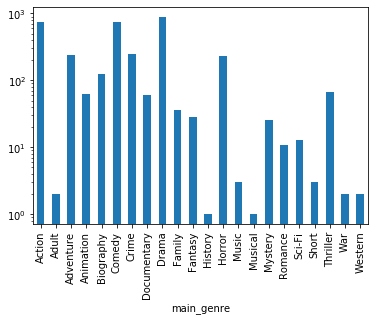

In [26]:
df_filtered.groupby('main_genre').filename.count().plot(kind='bar', logy=True)

# Production Region

#### Compare english regions based films againt the rest


In [27]:
df_filtered['main_region'] = [
    'English' if "English" in list(map(lambda x: re.sub(r'\s+','', x), production_region.split(','))) else "Other" for production_region in df_filtered.production_region
]

## Combinations

In [28]:
df_filtered.production_region.unique()

array(['French', 'German', 'English', 'Japanese',
       'English, Spanish, French, German, Italian', 'Hindi',
       'English, Russian', 'Korean', 'Cantonese, English, Thai, Mandarin',
       'Turkish', 'Danish', 'Romanian', 'Mandarin', 'Spanish', 'Dutch',
       'Filipino, Tagalog', 'Kirghiz', 'Thai, English', 'English, French',
       'Polish, Italian', 'Icelandic', 'Japanese, Mandarin',
       'Swedish, Danish', 'French, Italian', 'Thai', 'Thai, French',
       'English, Hindi, French', 'Norwegian, Urdu', 'Spanish, French',
       'Russian', 'Norwegian, German, English, Russian, Finnish',
       'English, German', 'English, Serbo-Croatian',
       'English, German, Russian', 'English, Spanish, Russian',
       'German, Russian, Georgian', 'Swedish', 'Hebrew',
       'French, German, Latin', 'Norwegian',
       'Portuguese, Mandarin, Japanese', 'English, Spanish',
       'French, Bambara, Spanish', 'French, English',
       'English, Korean, Estonian', 'Italian', 'French, Arabic',
 

In [29]:
df_filtered.production_region.unique().shape

(513,)

In [30]:
from collections import Counter
region_combination_frequs = Counter(df_filtered.production_region)
region_combination_frequs.most_common(20)

[('English', 1572),
 ('French', 290),
 ('German', 285),
 ('Japanese', 124),
 ('Spanish', 71),
 ('Korean', 49),
 ('English, Spanish', 44),
 ('Swedish', 40),
 ('Turkish', 37),
 ('English, French', 33),
 ('French, English', 32),
 ('Mandarin', 31),
 ('Norwegian', 30),
 ('Dutch', 25),
 ('Danish', 23),
 ('Italian', 22),
 ('German, English', 21),
 ('English, German', 20),
 ('Russian', 17),
 ('English, Japanese', 16)]

## Single regions

In [31]:
single_region = set([re.sub(r'\s+', '', region) for entry in df_filtered.production_region.str.split(',') for region in entry])
single_region

{'Aboriginal',
 'Acholi',
 'Afrikaans',
 'Albanian',
 'AmericanSignLanguage',
 'Ancient(to1453)',
 'Arabic',
 'Armenian',
 'Bable',
 'Bambara',
 'Basque',
 'Bengali',
 'Bosnian',
 'Breton',
 'Bulgarian',
 'Burmese',
 'Cantonese',
 'Catalan',
 'Chechen',
 'Chinese',
 'Corsican',
 'Creole',
 'Croatian',
 'Czech',
 'Danish',
 'Dari',
 'Dutch',
 'English',
 'Esperanto',
 'Estonian',
 'Filipino',
 'Finnish',
 'Flemish',
 'French',
 'Georgian',
 'German',
 'Greek',
 'Greenlandic',
 'Guarani',
 'Hebrew',
 'Hindi',
 'Hmong',
 'Hokkien',
 'Hungarian',
 'Icelandic',
 'Indonesian',
 'Inuktitut',
 'Inupiaq',
 'Irish',
 'Italian',
 'Japanese',
 'Khmer',
 'Kirghiz',
 'Klingon',
 'Korean',
 'Kurdish',
 'Ladakhi',
 'Lao',
 'Latin',
 'Latvian',
 'Lithuanian',
 'Malay',
 'Malayalam',
 'Maltese',
 'Mandarin',
 'Maori',
 'Marathi',
 'MinNan',
 'NorthAmericanIndian',
 'Norwegian',
 'Nyanja',
 'Occitan',
 'Panjabi',
 'Persian',
 'Polish',
 'Portuguese',
 'Pushto',
 'Quechua',
 'Romanian',
 'Romany',
 'Russi

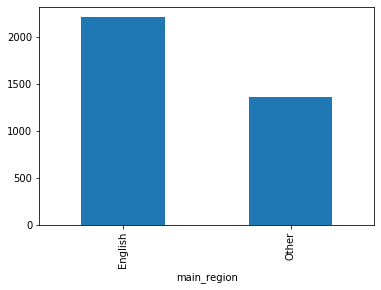

In [32]:
df_filtered.groupby('main_region').count().filename.plot(kind='bar')

In [33]:
df_filtered.shape

(3577, 21)

# PCA

In [34]:
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from stop_words import get_stop_words

In [35]:
tfidf = TfidfVectorizer(max_features=10000, stop_words=get_stop_words('de'))
X = tfidf.fit_transform(df_filtered.text)

In [36]:
reducer = TruncatedSVD(n_components=2)
Xr = reducer.fit_transform(X)

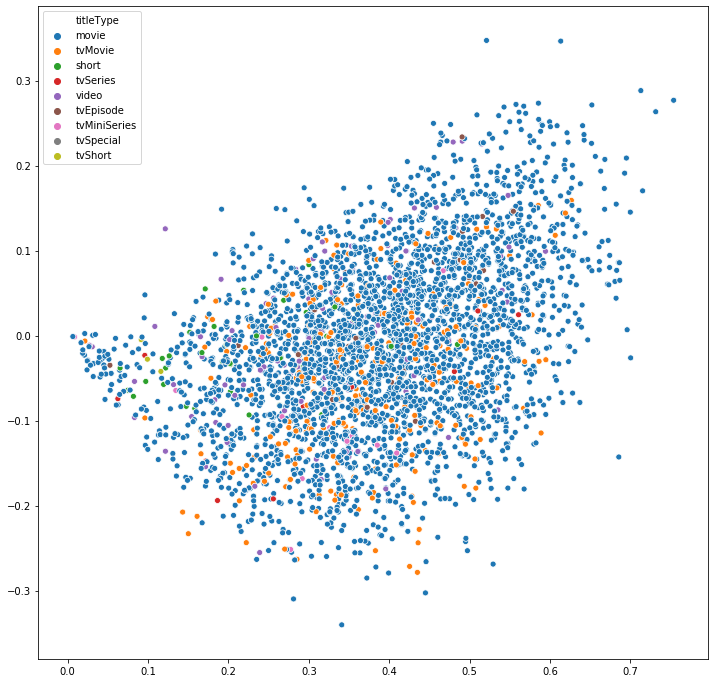

In [37]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.scatterplot(Xr[:,0], Xr[:,1], hue=df_filtered['titleType'])#, marker='.', s=50)
plt.show()

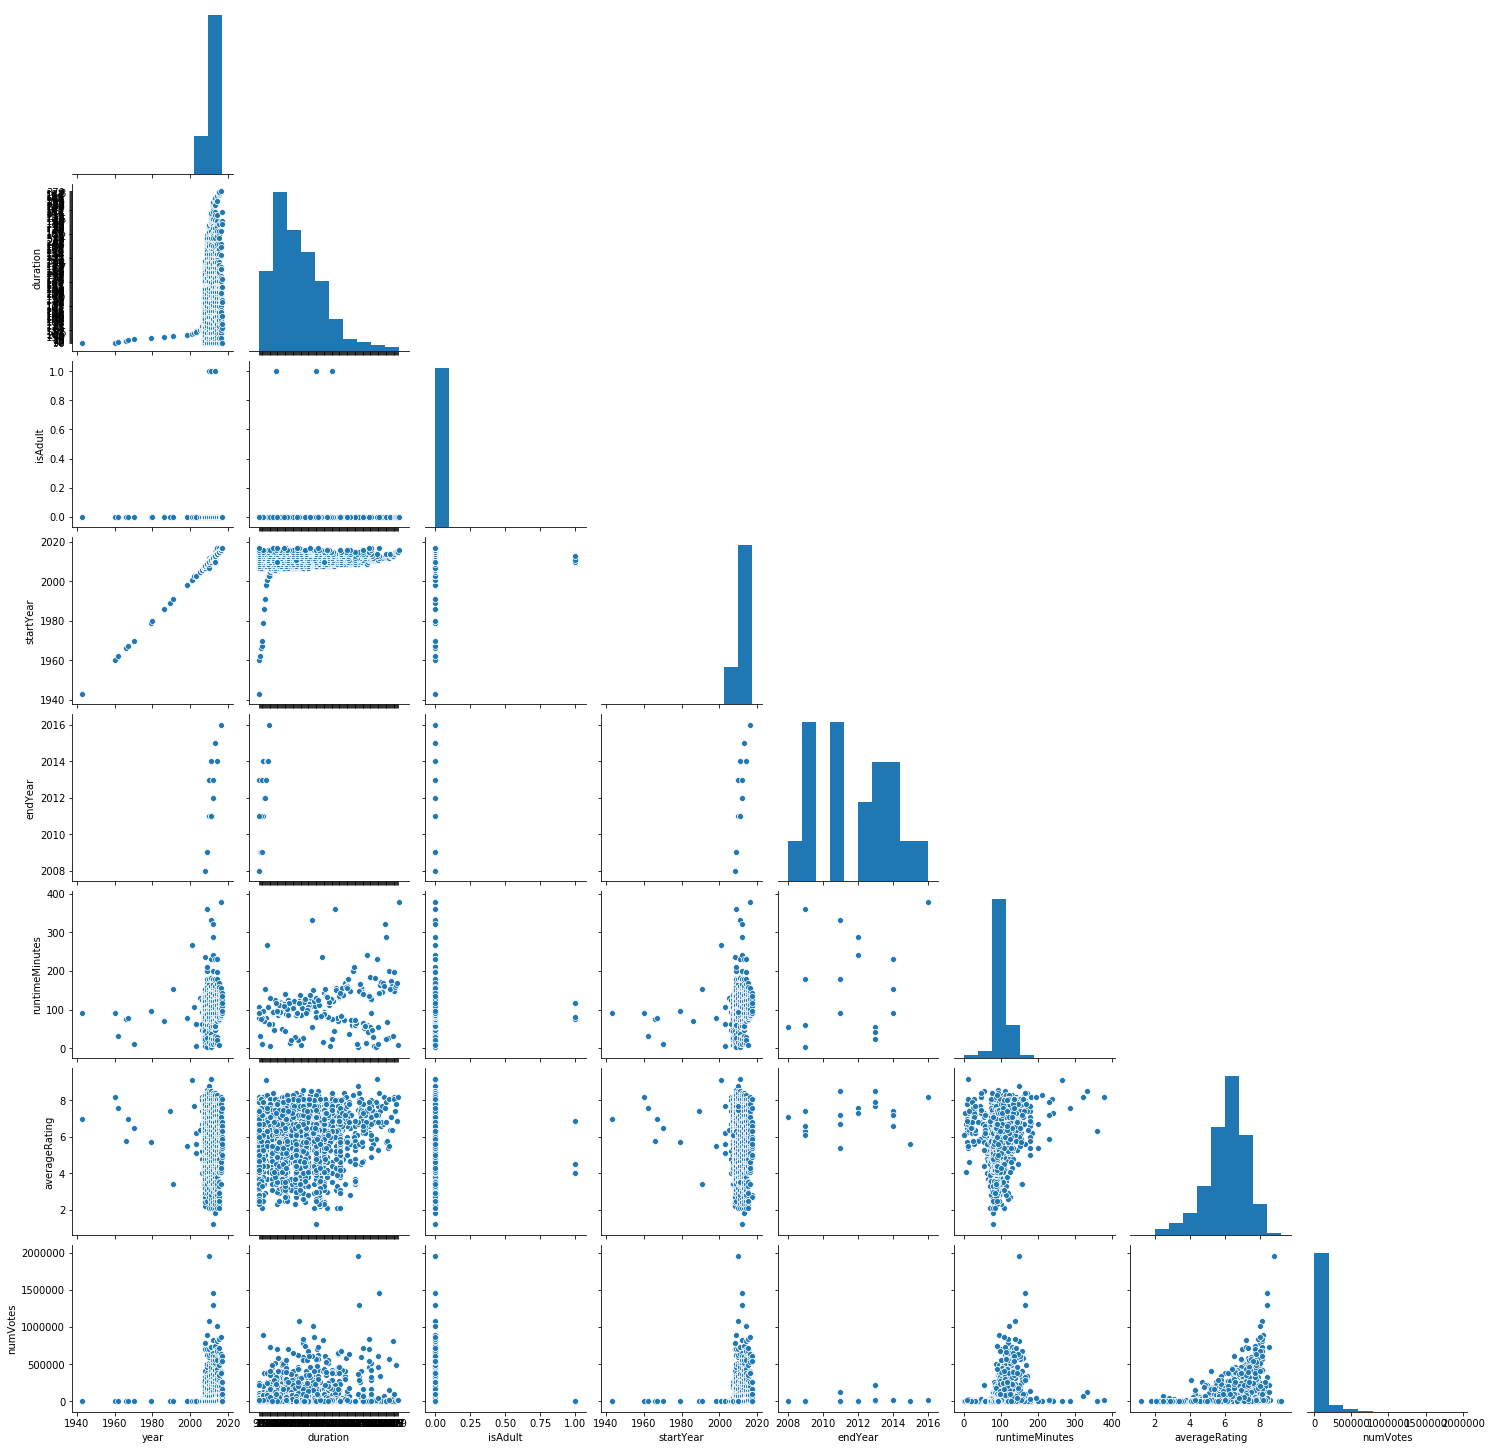

In [38]:
grid = sns.pairplot(df_filtered, corner=True)

/Users/lennartkeller/opt/anaconda3/envs/clustering/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value

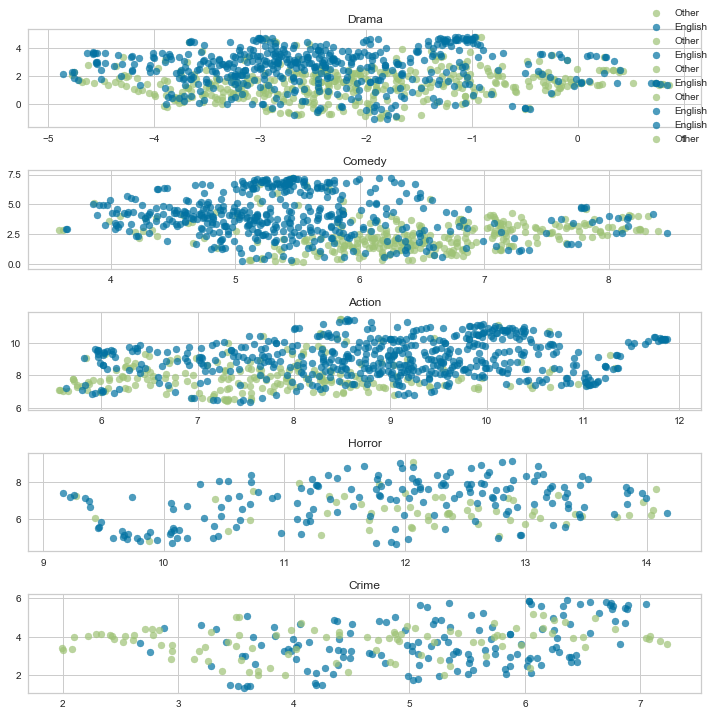

In [39]:
from yellowbrick.text import UMAPVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer
from stop_words import get_stop_words

genres = ['Drama', 'Comedy', 'Action', 'Horror', 'Crime']

fig, axs = plt.subplots(len(genres), figsize=(10, 10))


for genre, ax in zip(genres, axs):
    ax.set_title(genre)
    current_df = df_filtered[(df_filtered.main_genre == genre)]
    tfidf = TfidfVectorizer(stop_words=get_stop_words('de'), max_features=6500)
    X = tfidf.fit_transform(current_df.text)
    
    umap = UMAPVisualizer(ax=ax)
    umap.fit(X, current_df.main_region)

    
fig.legend()
plt.tight_layout()
plt.show()